In [1]:
from methods import *

In [2]:
lm = LMEO()

In [3]:
def message_for_city(city):
    return f"Reccommend five hotels in {city} UK. \n State the name of the hotel on a new line each time not using a numbered list."

In [4]:
import pickle

with open(r'.\pickles\ranks_Exeter.pkl', 'rb') as f:
    exeter_ranks = pickle.load(f)


In [5]:
from pprint import pprint
pprint(exeter_ranks)

[['HotelduVinExeter',
  'MercureExeterSouthgateHotel',
  'SouthernhayHouseHotel',
  'TheMagdalenChapter',
  'JurysInnExeter'],
 ['TheQueensCourtHotel',
  'TheDevonHotel',
  'TheMagdalenChapter',
  'MercureExeterRougemontHotel',
  'HolidayInnExpressExeter'],
 ['MercureExeterSouthgateHotel',
  'TheDevonHotel',
  'JurysInnExeter',
  'HotelduVinExeter',
  'QueensCourtHotel&Residence'],
 ['TheMagdalenChapter',
  'MercureExeterRougemontHotel',
  'JurysInnExeter',
  'HotelduVinExeter',
  'TheDevonHotel'],
 ['HotelduVinExeter',
  'MercureExeterRougemontHotel',
  'TheMagdalenChapter',
  'JurysInnExeter',
  'SouthgateHotel'],
 ['TheMagdalenChapter',
  'AbodeExeter',
  'MercureExeterSouthgateHotel',
  'JurysInnExeter',
  'HolidayInnExpressExeter'],
 ['MercureExeterRougemontHotel',
  'TheMagdalenChapter',
  'HotelduVinExeter',
  'JurysInnExeter',
  'TheDevonHotel'],
 ['MercureExeterSouthgateHotel',
  'TheMagdalenChapter',
  'JurysInnExeter',
  'TheDevonHotel',
  'HotelduVinExeter'],
 ['MercureExet

In [6]:
exeter_target_words = ['ercure', 'urys', 'uVin', 'Devon', 'ABode', 'Magdal', 'Queens', 'Southern', 'Globe', 'uckerel', 'South', 'HolidayInn', 'Clock', 'Gate']

In [7]:
exeter_dict = lm.group_hotels(exeter_ranks, exeter_target_words)

In [8]:
freq_dict = lm.frequency_in_row(exeter_ranks, exeter_dict, 3)

In [9]:
pprint(freq_dict)

{0: {'Devon': 14,
     'Magdal': 21,
     'South': 15,
     'ercure': 42,
     'uVin': 12,
     'urys': 5},
 1: {'Devon': 19,
     'Gate': 5,
     'Magdal': 9,
     'South': 26,
     'Southern': 3,
     'ercure': 45,
     'uVin': 7,
     'urys': 5},
 2: {'Devon': 17,
     'Gate': 4,
     'HolidayInn': 3,
     'Magdal': 9,
     'Queens': 3,
     'South': 10,
     'Southern': 5,
     'ercure': 11,
     'uVin': 20,
     'urys': 25},
 3: {'ABode': 6,
     'Devon': 11,
     'Gate': 3,
     'HolidayInn': 16,
     'Magdal': 7,
     'Queens': 4,
     'South': 7,
     'Southern': 4,
     'ercure': 3,
     'uVin': 15,
     'urys': 20},
 4: {'ABode': 7,
     'Clock': 4,
     'Devon': 11,
     'ExeterCourtHotel': 3,
     'Gate': 3,
     'Globe': 4,
     'HolidayInn': 17,
     'Magdal': 4,
     'Queens': 6,
     'South': 8,
     'Southern': 6,
     'uVin': 6,
     'uckerel': 3,
     'urys': 18}}


Come up with a couple metrics which correlate with certain aspects.

## Plotting the frequency of the hotels which appear in the first row.

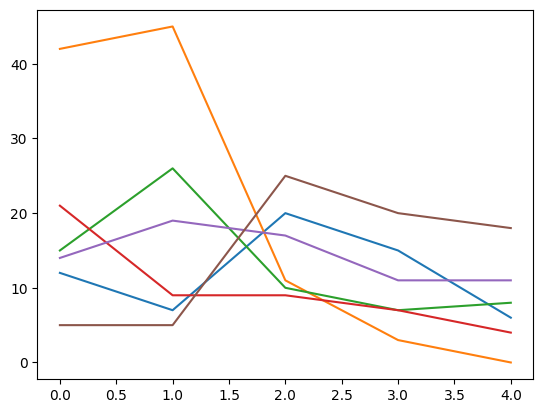

In [10]:
import matplotlib.pyplot as plt

# Getting id of all in the first row
hotel_id_list = list(freq_dict[0].keys())

for hotel_id in hotel_id_list:
    plt.plot([place.get(hotel_id, 0) for _, place in freq_dict.items()])

plt.show()

In [11]:
def plot_from_ranks_target(pickle_path, target_words, filter:int = 3):
    with open(pickle_path, 'rb') as f:
        ranks = pickle.load(f)

    target_dict = lm.group_hotels(ranks, target_words)

    freq_dict = lm.frequency_in_row(ranks, target_dict, filter)

    hotel_id_list = list(freq_dict[0].keys())

    for hotel_id in hotel_id_list:
        plt.plot([place.get(hotel_id, 0) for _, place in freq_dict.items()])

    plt.show()

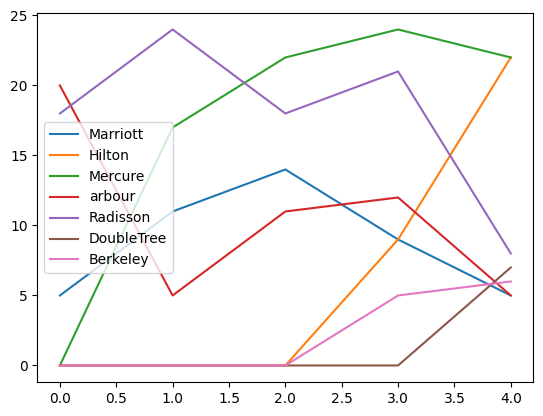

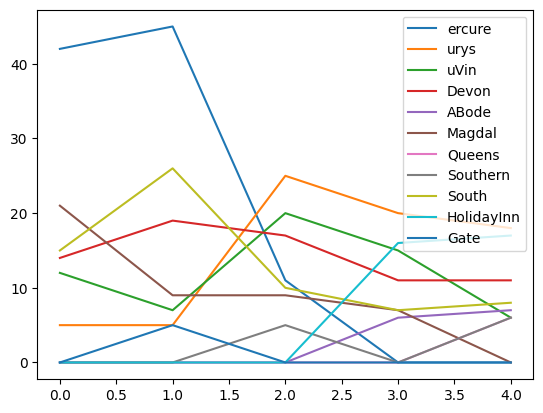

In [14]:
bristol_words = ['Marriott','Gainsborough','Hilton','Mercure', 'arbour' ,'Radisson', 'Avon', 'DoubleTree', 'Berkeley', 'ibis', 'Future','ztec', 'gabel']

filter_amount = 5

Static.plot_from_ranks_target(r'.\pickles\ranks_Bristol.pkl', bristol_words, filter_amount)
Static.plot_from_ranks_target(r'.\pickles\ranks_Exeter.pkl', exeter_target_words, filter_amount)